# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_cloud = []
city_wind = []
city_country = []
city_date = []

In [6]:
print("Beginning Data Retrieval")
print("-----------------------------")

index = 0
set_count = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


for x in cities: 
    try:
        response = requests.get(query_url + x).json()
        
        city_name.append(response["name"])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        city_max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_cloud.append(response['clouds']['all'])
        city_wind.append(response['wind']['speed'])
        city_country.append(response['sys']['country'])
        city_date.append(response['dt'])
        
        if index > 49:
            index = 0
            set_count += 1
        else:
            index += 1
            
        print(f"Processing Record {index} of Set {set_count} | {x}")
           
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | sayyan
Processing Record 2 of Set 1 | lakes entrance
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kununurra
Processing Record 7 of Set 1 | haines junction
Processing Record 8 of Set 1 | kichmengskiy gorodok
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | te anau
Processing Record 13 of Set 1 | carutapera
City not found. Skipping...
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | sur
Processing Record 16 of Set 1 | puerto escondido
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saryg-sep
Processing Record 19 of Set 1 | hofn
City not found. Skipping...
Processing Record 20 of Set 1 | sikeston
Processing Record 21 of Set 1 | butaritari
Processin

Processing Record 33 of Set 4 | kathu
Processing Record 34 of Set 4 | geneva
Processing Record 35 of Set 4 | margate
Processing Record 36 of Set 4 | rusape
Processing Record 37 of Set 4 | launceston
Processing Record 38 of Set 4 | pusad
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | kisoro
Processing Record 42 of Set 4 | mandalgovi
Processing Record 43 of Set 4 | svetlogorsk
Processing Record 44 of Set 4 | rio tercero
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | tooele
Processing Record 47 of Set 4 | pangkalanbuun
Processing Record 48 of Set 4 | zverinogolovskoye
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | praia da vitoria
Processing Record 0 of Set 5 | dalby
Processing Record 1 of Set 5 | bangkal
Processing Record 2 of Set 5 | mikhaylovka
Processing Record 3 of Set 5 | camana
Processing Record 4 of Set 5 | qasigiannguit
Processing Record 5 of Set 5 | saint-

Processing Record 15 of Set 8 | mocuba
Processing Record 16 of Set 8 | ouadda
Processing Record 17 of Set 8 | isla mujeres
Processing Record 18 of Set 8 | gazli
Processing Record 19 of Set 8 | sao domingos do maranhao
Processing Record 20 of Set 8 | beatrice
Processing Record 21 of Set 8 | pangody
Processing Record 22 of Set 8 | camalu
Processing Record 23 of Set 8 | coahuayana
Processing Record 24 of Set 8 | deer lake
City not found. Skipping...
Processing Record 25 of Set 8 | santiago del estero
Processing Record 26 of Set 8 | nanortalik
Processing Record 27 of Set 8 | farim
Processing Record 28 of Set 8 | weihe
Processing Record 29 of Set 8 | wairoa
Processing Record 30 of Set 8 | saskylakh
Processing Record 31 of Set 8 | ekhabi
Processing Record 32 of Set 8 | placido de castro
Processing Record 33 of Set 8 | kasama
Processing Record 34 of Set 8 | naze
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | amahai
Processing Record 37 of Set 8 | vanavara
Processing Reco

Processing Record 50 of Set 11 | mananjary
Processing Record 0 of Set 12 | kavaratti
Processing Record 1 of Set 12 | north platte
Processing Record 2 of Set 12 | san felipe
Processing Record 3 of Set 12 | buckeye
Processing Record 4 of Set 12 | balykshi
Processing Record 5 of Set 12 | batemans bay
Processing Record 6 of Set 12 | apache junction
Processing Record 7 of Set 12 | zabaykalsk
Processing Record 8 of Set 12 | tubmanburg
Processing Record 9 of Set 12 | yoichi
Processing Record 10 of Set 12 | pitimbu
Processing Record 11 of Set 12 | basco
Processing Record 12 of Set 12 | ambulu
Processing Record 13 of Set 12 | saint-tite
Processing Record 14 of Set 12 | la ronge
Processing Record 15 of Set 12 | begamganj
Processing Record 16 of Set 12 | zhigansk
Processing Record 17 of Set 12 | teknaf
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
data_df = pd.DataFrame({
    "City": city_name,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_cloud,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
})

data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sayyan,15.1718,44.3244,62.10,70,75,0.67,YE,1627169499
1,Lakes Entrance,-37.8811,147.9810,51.19,54,67,16.08,AU,1627169504
2,Yellowknife,62.4560,-114.3525,58.32,44,75,1.99,CA,1627169414
3,Dikson,73.5069,80.5464,37.60,96,94,12.17,RU,1627169487
4,Rikitea,-23.1203,-134.9692,69.46,55,0,1.25,PF,1627169505
...,...,...,...,...,...,...,...,...,...
573,Saint-Tite,46.7334,-72.5658,75.51,73,91,4.83,CA,1627169717
574,La Ronge,55.1001,-105.2842,75.45,41,75,11.50,CA,1627169497
575,Begamganj,23.6000,78.3333,74.34,96,98,7.20,IN,1627169718
576,Zhigansk,66.7697,123.3711,63.12,59,26,17.27,RU,1627169718


In [8]:
# Looking at the max row for the humidity column to see if there are any above 100.
data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,19.149484,19.319123,68.662336,70.832180,55.280277,7.745035,1.627170e+09
std,33.835481,91.524351,14.274393,20.311129,38.438152,5.315611,9.070309e+01
min,-54.800000,-179.166700,33.310000,9.000000,0.000000,0.000000,1.627169e+09
25%,-10.304700,-63.985225,58.237500,60.000000,19.000000,3.830000,1.627170e+09
50%,23.879250,22.574050,70.610000,75.000000,64.000000,6.520000,1.627170e+09
75%,47.706650,102.444925,79.687500,86.000000,94.000000,10.902500,1.627170e+09
max,78.218600,178.416700,105.850000,100.000000,100.000000,31.000000,1.627170e+09


In [9]:
# Writing our dataframe to a CSV

data_df.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

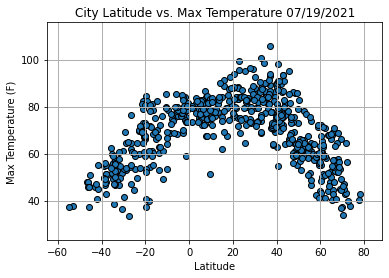

In [12]:
x_values = data_df["Lat"]
y_values = data_df["Max Temp"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Max Temperature 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 10, max(y_values) + 10)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

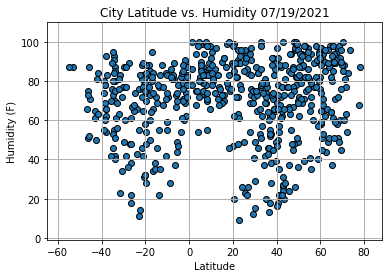

In [13]:
x_values = data_df["Lat"]
y_values = data_df["Humidity"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Humidity 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Humidity (F)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 10, max(y_values) + 10)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

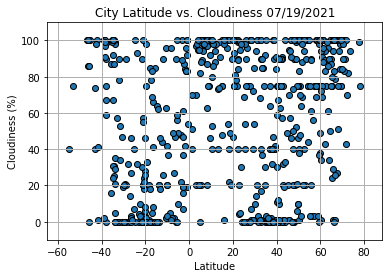

In [14]:
x_values = data_df["Lat"]
y_values = data_df["Cloudiness"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Cloudiness 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 10, max(y_values) + 10)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

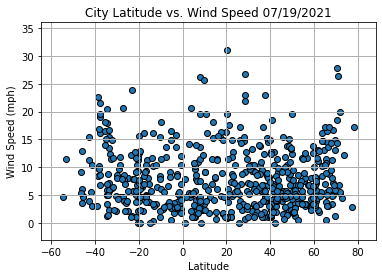

In [15]:
x_values = data_df["Lat"]
y_values = data_df["Wind Speed"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Wind Speed 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 3, max(y_values) + 5)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Wind Speed.png")

## Linear Regression

In [75]:
def do_linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y, edgecolor = 'black')
    plt.plot(x,regress_values,"r-")
    
    correlation = st.pearsonr(x, y)
    print(f"The Pearson correlation is: {round(correlation[0],2)}")
    print(f"The line equation is: {line_eq}")
    
    return line_eq

In [76]:
# Northern Hemisphere is where Lat >= 0
north_hemi = data_df.loc[(data_df["Lat"] >= 0), :]

# Southern Hemisphere is where Lat < 0
south_hemi = data_df.loc[(data_df["Lat"] < 0), :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Pearson correlation is: -0.66
The line equation is: y = -0.47x + 90.01


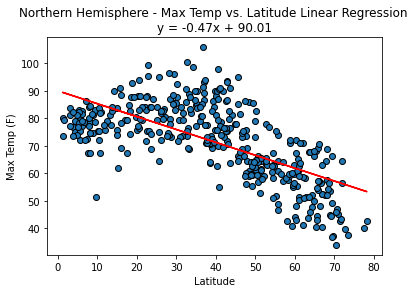

In [77]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]

line_eq = do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression " + "\n" + line_eq)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
#plt.annotate(line_eq,(min(x_values), min(y_values)),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Pearson correlation is: 0.77
The line equation is: y = 0.77x + 79.48


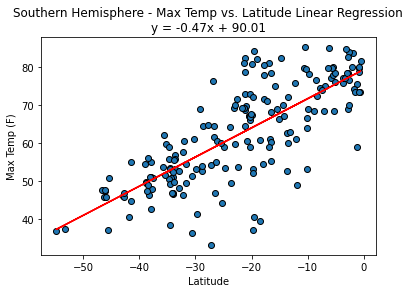

In [78]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]

do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression" + "\n" + line_eq)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
#plt.annotate(line_eq,(min(x_values), max(y_values) - 5),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Pearson correlation is: -0.04
The line equation is: y = -0.05x + 74.45


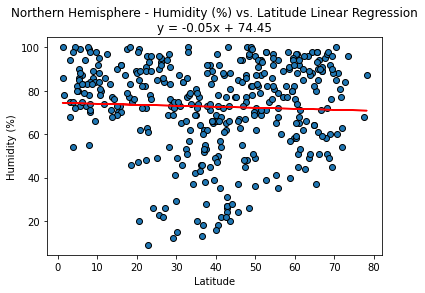

In [79]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]

line_eq = do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression" + "\n" + line_eq)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.annotate(line_eq,(min(x_values), min(y_values)),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Pearson correlation is: 0.05
The line equation is: y = 0.07x + 68.66


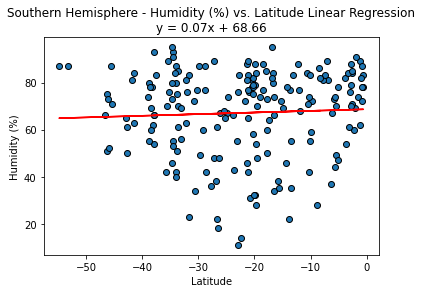

In [80]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]

line_eq = do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression" + "\n" + line_eq)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.annotate(line_eq,(min(x_values), min(y_values)),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Pearson correlation is: -0.02
The line equation is: y = -0.03x + 62.66


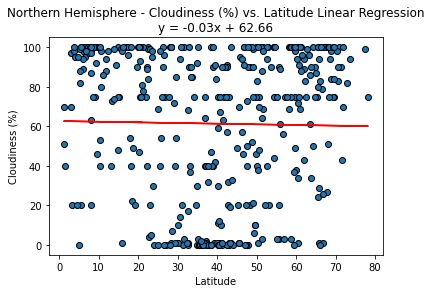

In [81]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]

line_eq = do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression" + "\n" + line_eq)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.annotate(line_eq,(min(x_values), min(y_values) + 5),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Pearson correlation is: -0.13
The line equation is: y = -0.38x + 34.31


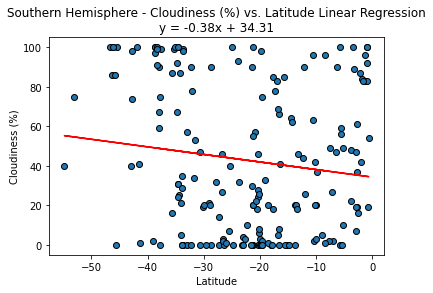

In [82]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]

line_eq = do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression" + "\n" + line_eq)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.annotate(line_eq,(min(x_values), min(y_values) + 5),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Pearson correlation is: 0.02
The line equation is: y = 0.01x + 7.44


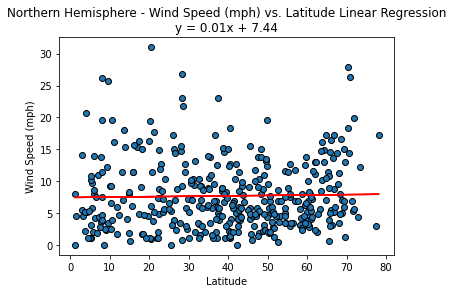

In [83]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]

line_eq = do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression" + "\n" + line_eq)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.annotate(line_eq,(min(x_values), max(y_values) - 2),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Pearson correlation is: -0.23
The line equation is: y = -0.09x + 5.87


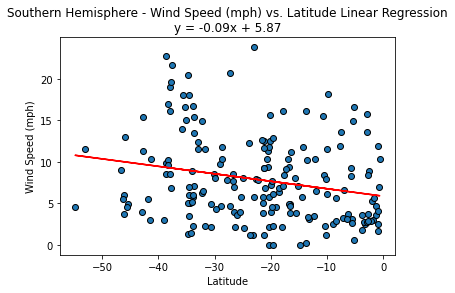

In [84]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]

line_eq = do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression" + "\n" + line_eq)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.annotate(line_eq,(min(x_values), min(y_values)),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")